In [9]:
import numpy as np
import matplotlib.pyplot as plt

class Spectrum:
    
    def __init__(self, resolution=10):
        self.resolution = resolution
        
    def draw(self):
        x = np.linspace(0, 1, self.resolution)
        y = np.linspace(0, 1, self.resolution)
        X, Y = np.meshgrid(x, y)
        R = X
        G = Y
        B = 1 - X
        
        imp = np.dstack((R, G, B))
        self.output = np.clip(imp, 0, 1)
        
        return self.output.copy()
    
    def show(self):
        plt.imshow(self.output)
        plt.axis('off')
        plt.show()

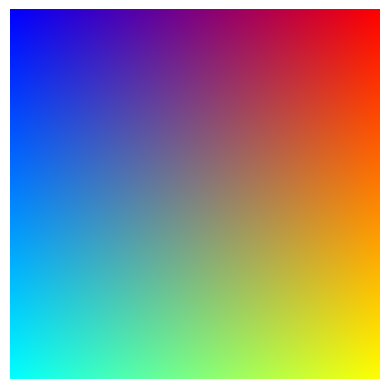

In [10]:
check = Spectrum(resolution=256)
check.draw()
check.show()

In [2]:
import os.path
import json
import scipy.misc
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize


# In this exercise task you will implement an image generator. Generator objects in python are defined as having a next function.
# This next function returns the next generated object. In our case it returns the input of a neural network each time it gets called.
# This input consists of a batch of images and its corresponding labels.
class ImageGenerator:
    def __init__(self, file_path, label_path, batch_size, image_size, rotation=False, mirroring=False, shuffle=False):
        # Define all members of your generator class object as global members here.
        # These need to include:
        # the batch size
        # the image size
        # flags for different augmentations and whether the data should be shuffled for each epoch
        # Also depending on the size of your data-set you can consider loading all images into memory here already.
        # The labels are stored in json format and can be directly loaded as dictionary.
        # Note that the file names correspond to the dicts of the label dictionary.

        self.class_dict = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog',
                           7: 'horse', 8: 'ship', 9: 'truck'}
        #TODO: implement constructor
        self.file_path = file_path
        self.label_path = label_path
        self.batch_size = batch_size
        self.image_size = image_size
        self.rotation = rotation
        self.mirroring = mirroring
        self.shuffle = shuffle
        
        # load labels
        with open(label_path, "r") as f:
            self.labels = json.load(f)
        self.file_names = list(self.labels.keys())
        self.index = 0
        self.epoch = 0

    def next(self):
        # This function creates a batch of images and corresponding labels and returns them.
        # In this context a "batch" of images just means a bunch, say 10 images that are forwarded at once.
        # Note that your amount of total data might not be divisible without remainder with the batch_size.
        # Think about how to handle such cases
        #TODO: implement next method
        start = self.index
        end = start + self.batch_size
        batch_files = self.file_names[start:end]
        images = []
        labels = []

        # Handle wrap-around (end of epoch)
        if end >= len(self.file_names):
            self.epoch += 1
            overflow = end - len(self.file_names)
            batch_files = self.file_names[start:] + self.file_names[:overflow]
            if self.shuffle:
                np.random.shuffle(self.file_names)
            self.index = overflow
        else:
            self.index = end
            
        # Load images
        images, labels = [], []
        for file in batch_files:
            img = np.load(os.path.join(self.file_path, f"{file}.npy"))
            img = resize(img, self.image_size, anti_aliasing=True)
            images.append(img)
            labels.append(self.labels[file])

        return np.array(images), np.array(labels)
        #return images, labels

    def augment(self,img):
        # this function takes a single image as an input and performs a random transformation
        # (mirroring and/or rotation) on it and outputs the transformed image
        #TODO: implement augmentation function
        # Apply augmentations
        if self.mirroring:
            img = np.fliplr(img)
        if self.rotation:
            img = np.rot90(img)
        return img

    def current_epoch(self):
        # return the current epoch number
        return self.epoch

    def class_name(self, x):
        # This function returns the class name for a specific input
        #TODO: implement class name function
        return self.class_dict.get(x, "Unknown")
    def show(self):
        # In order to verify that the generator creates batches as required, this functions calls next to get a
        # batch of images and labels and visualizes it.
        #TODO: implement show method
        images, labels = self.next()
        cols = int(np.sqrt(len(images)))
        rows = int(np.ceil(len(images) / cols))
        fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
        axes = axes.flatten()

        for i in range(len(images)):
            axes[i].imshow(images[i])
            axes[i].set_title(self.class_name(int(labels[i])))
            axes[i].axis("off")

        for j in range(i + 1, len(axes)):
            axes[j].axis("off")

        plt.tight_layout()
        plt.show()
        pass



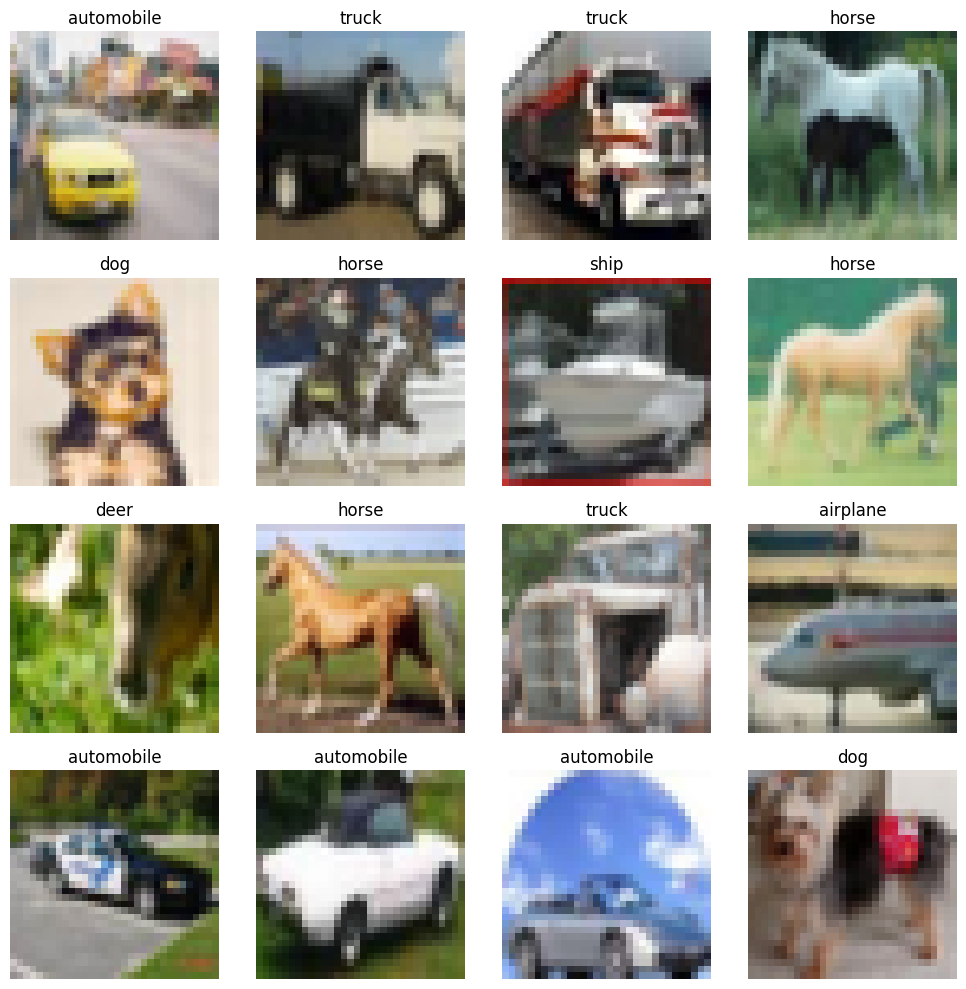

In [4]:
label_fic = ImageGenerator(file_path="exercise0_material/src_to_implement/data/exercise_data/", 
                           label_path="exercise0_material/src_to_implement/data/Labels.json", 
                           batch_size=16, 
                           image_size=(32,32), 
                           rotation=True, 
                           mirroring=False, 
                           shuffle=True)
label_fic.show()